# Problem 6

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('iris.data', header=None)
df.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
cnames = np.unique(df[4])
print(cnames)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


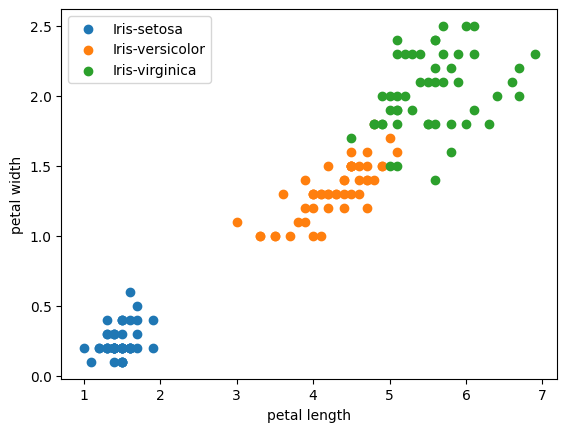

In [4]:
for cname in cnames:
    df_tmp = df[df[4] == cname]
    plt.scatter(df_tmp[2], df_tmp[3])

plt.legend(cnames)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()
le.fit(cnames)
y = le.transform(df[4])

X = df.drop([0, 1, 4], axis=1).to_numpy()
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) * 2 - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.inspection import DecisionBoundaryDisplay

In [7]:
def draw_confusion_matrix(matrix):
    green = (30, 200, 40, 160)
    red = (255, 25, 0, 140)

    x = matrix.shape[1]
    y = matrix.shape[0]

    colors = [[green if i==j else red for i in range(x)] for j in range(y)]
    colors = np.array(colors).astype(np.uint8)

    fig, ax = plt.subplots(figsize=(4, 4), dpi=90)
    ax.imshow(colors)

    ax.set_xticks(np.arange(x), labels=range(x))
    ax.set_yticks(np.arange(y), labels=range(y))
    
    ax.set_xticks(np.arange(-.5, x, 1), minor=True)
    ax.set_yticks(np.arange(-.5, y, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', bottom=False, left=False)

    ax.set_xlabel("prediction")
    ax.set_ylabel("label")

    for i in range(y):
        for j in range(x):
            text = ax.text(j, i, matrix[i][j], ha="center", va="center", color='black')

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

In [8]:
def plot_decision_regions(clf, X, y):
    fig, ax = plt.subplots(1, figsize=(5, 5), dpi=90)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X, ax=ax, eps=0.3,
        response_method="predict",
        cmap=plt.cm.coolwarm, alpha=0.8,
        grid_resolution=400
    )
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    ax.set_title("decision regions")
    ax.set_xlabel('petal length')
    ax.set_ylabel('petal width')
    fig.tight_layout()
    plt.show()

In [9]:
clf = OneVsRestClassifier(svm.SVC(kernel='linear'))
clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print("accuracy: {:.2f} %".format(accuracy_score(y_test, yp)*100))

accuracy: 84.21 %


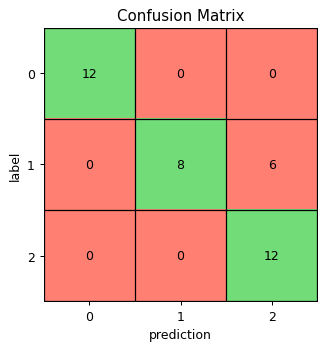

In [10]:
cMat = confusion_matrix(y_test, yp)
draw_confusion_matrix(cMat)

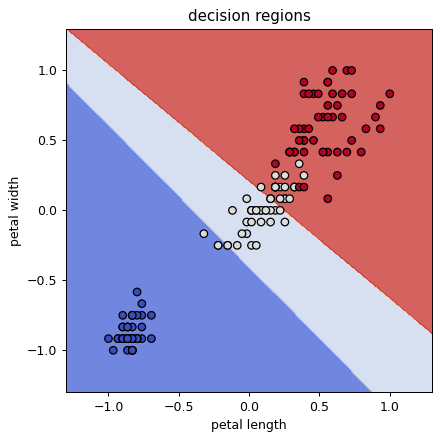

In [11]:
plot_decision_regions(clf, X, y)

In [12]:
clf = OneVsOneClassifier(svm.SVC(kernel='linear'))
clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print("accuracy: {:.2f} %".format(accuracy_score(y_test, yp)*100))

accuracy: 97.37 %


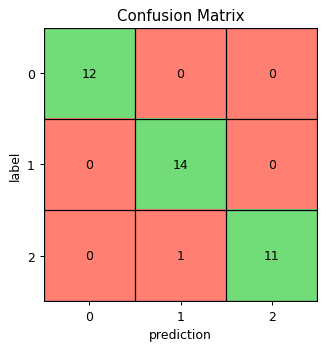

In [13]:
cMat = confusion_matrix(y_test, yp)
draw_confusion_matrix(cMat)

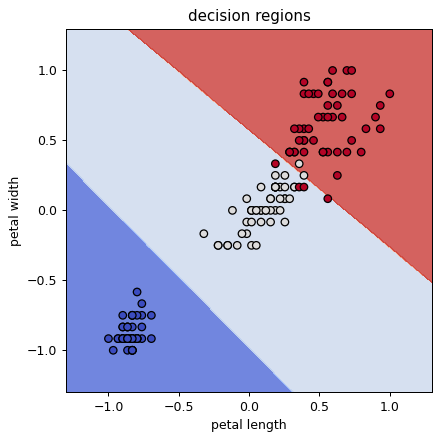

In [14]:
plot_decision_regions(clf, X, y)

In [15]:
clf = OneVsRestClassifier(svm.SVC(kernel='rbf', gamma=1))
clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print("accuracy: {:.2f} %".format(accuracy_score(y_test, yp)*100))

accuracy: 97.37 %


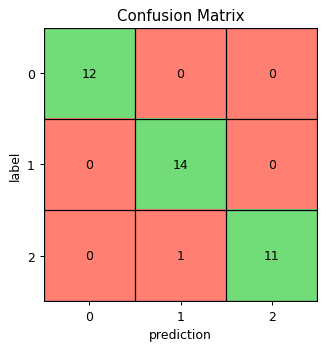

In [16]:
cMat = confusion_matrix(y_test, yp)
draw_confusion_matrix(cMat)

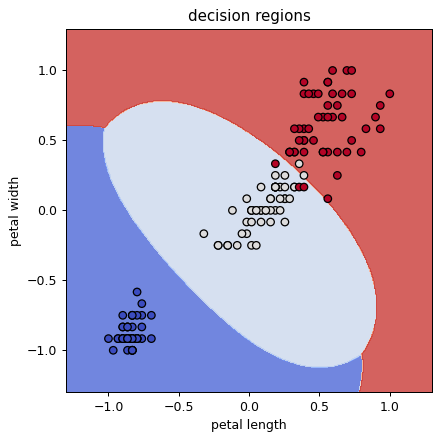

In [17]:
plot_decision_regions(clf, X, y)

In [18]:
clf = OneVsRestClassifier(svm.SVC(kernel='poly', degree=5, C=50, gamma="auto"))
clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print("accuracy: {:.2f} %".format(accuracy_score(y_test, yp)*100))

accuracy: 97.37 %


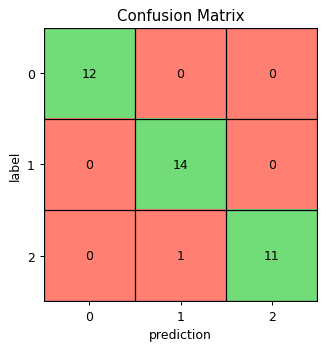

In [19]:
cMat = confusion_matrix(y_test, yp)
draw_confusion_matrix(cMat)

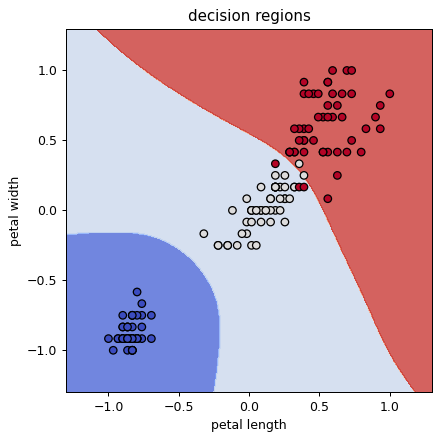

In [20]:
plot_decision_regions(clf, X, y)